# State of Data Science: exploring the Kaggle 2017 Survey

A Kaggle Machine Learing and Data Science 2017 Survey está dividida em três datasets:

- ___multipleChoiceResponses.csv:___ contendo todas as respostas às perguntas de múltipla escolha armazenadas não randomicamente, mantendo as respostas do mesmo entrevistado em uma única linha
- ___freeformResponses.csv:___ contém todas as respostas às perguntas abertas armazenadas randomicamente, sendo que em uma linha as respostas não correspondem ao mesmo entrevistado
- ___conversionRates.csv:___ contém a conversão de todas as moedas presentes na pesquisa para USD

De acordo com o resumo fornecido pelo Kaggle, temos algumas informações contextualizando o dataset: 

- Foram computadas mais de 16.000 respostas à pesquisa em 171 países
- Países com menos de 50 respostas à pesquisa foram agrupados, aparecendo como 'Other' no dataset
- Com intuito de aumentar a relevância da pesquisa, perguntas diferentes foram feitas à cada entrevistado dependendo da sua situação empregatícia
- Não existe uma chave para ligar as respostas abertas às respostas fechadas

Sendo assim, a análise será feita apenas com as questões de múltipla escolha.

### Motivação

Inicialmente, o intuito dessa análise seria explorar a disparidade de gênero dentro do campo de ciência de dados, mas existem alguns dados interessantes a serem explorados onde não seria relevante aplicar a separação por gêneros, como por exemplo linguagem mais utilizada. E sem um meio de ligar as respostas abertas ao seu interlocutor, perde-se um pouco do potencial de análise da disparidade.

Então irei explorar os dados de uma maneira mais geral, focando na disparidade de gêneros apenas quando relevante :)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
schema = pd.read_csv('../data/schema.csv')
multiple_choice_df = pd.read_csv('../data/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
conversion_rates = pd.read_csv('../data/conversionRates.csv')

In [3]:
multiple_choice_df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Disparidade de gêneros

Número total de entrevistados: 16716
Número total de entrevistados que se autodeclararam como do gênero masculino: 13610
Número total de entrevistadas que se autodeclararam como do gênero feminino: 2778
Número total de entrevistad@s que se autodeclararam como não-binário, genderqueer, não-conforme ou outro gênero: 328 



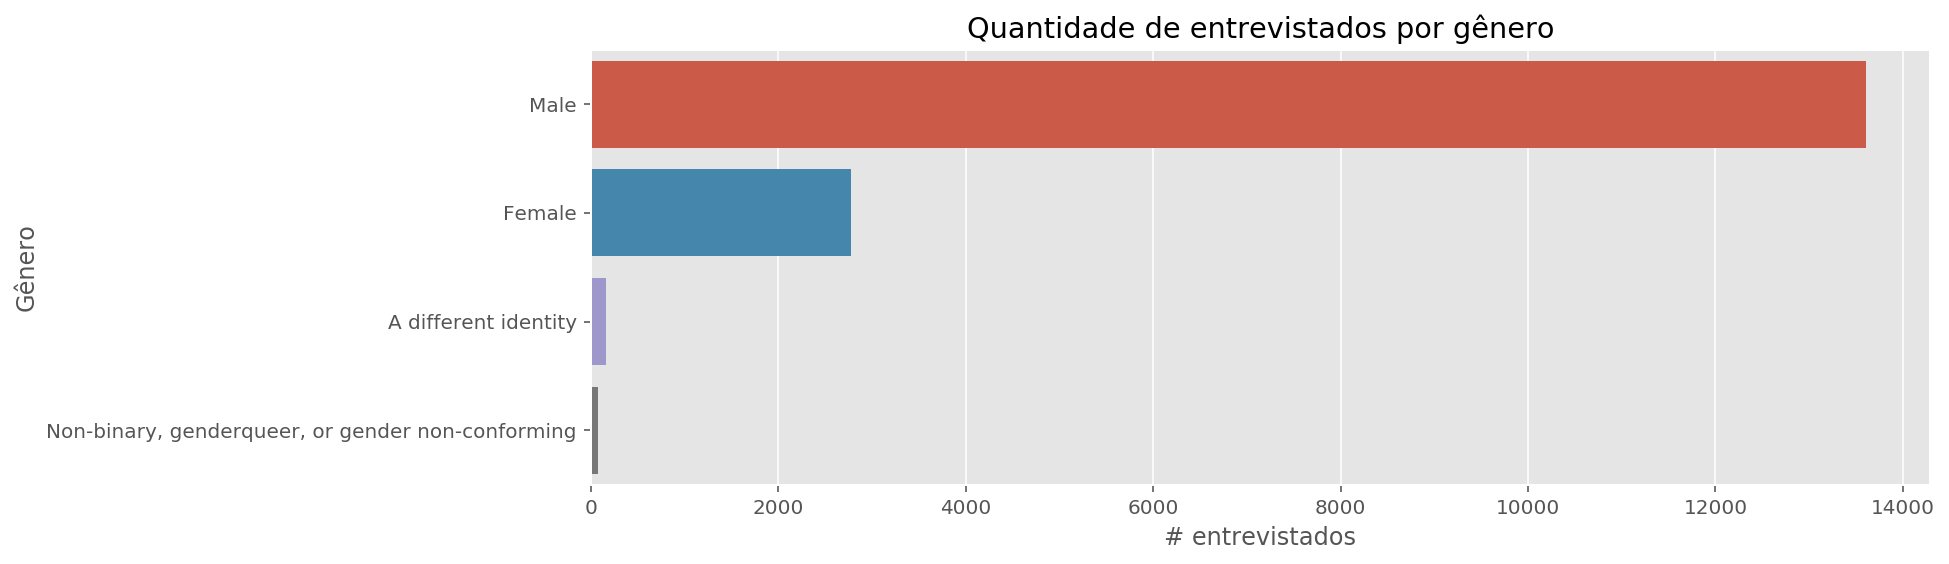

In [4]:
all_st = multiple_choice_df.shape[0]
male_st = multiple_choice_df[multiple_choice_df['GenderSelect'] == 'Male'].shape[0]
female_st = multiple_choice_df[multiple_choice_df['GenderSelect'] == 'Female'].shape[0]

# Número de entrevistados 
print('Número total de entrevistados:', all_st)
print('Número total de entrevistados que se autodeclararam como do gênero masculino:', male_st)
print('Número total de entrevistadas que se autodeclararam como do gênero feminino:', female_st)
print('Número total de entrevistad@s que se autodeclararam como não-binário, genderqueer, não-conforme ou outro gênero:', \
      all_st - (male_st + female_st), '\n')

fig, axes = plt.subplots(figsize=(12,4))
sns.countplot(y=multiple_choice_df['GenderSelect'], order=multiple_choice_df['GenderSelect'].value_counts().index)
plt.title('Quantidade de entrevistados por gênero')
axes.set(xlabel='# entrevistados', ylabel='Gênero') 
plt.show()

Como esperado, a disparidade de gênero em termos de quantidade, é bem grande. Na STEM (como é chamada a área de ciências exatas mundialmente) a percentagem de mulheres matriculadas está entre 14% e 18% <a href=https://www.computerscience.org/resources/women-in-computer-science/><sup>[1]</sup></a>. Na pesquisa feita pelo Kaggle, a proporção de mulheres é um pouco maior, chegando à 20.4% (o que ainda é muito pouco  😢).

## Pirâmide etária

Entrevistado mais novo: 0.0 ano(s)
Entrevistado mais velho: 100.0 anos

Idade média dos entrevistados: 32.37
Idade mediana dos entrevistados: 30.0
Idade mais frequente: 25.0 



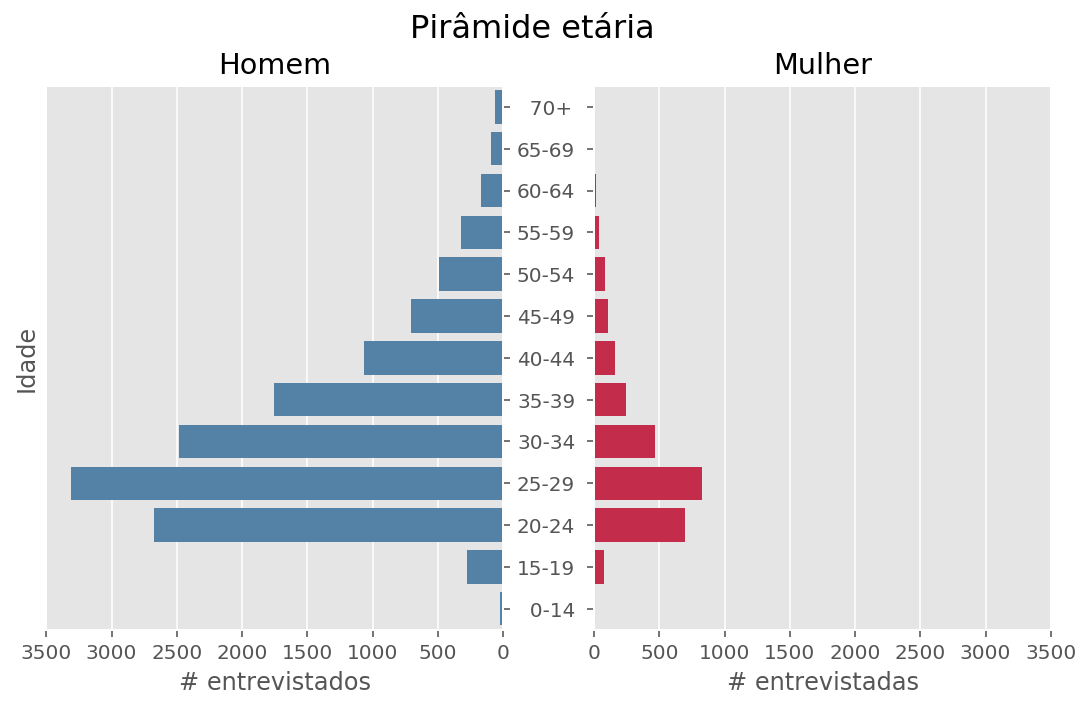

In [5]:
# Idades máxima e mínima
print('Entrevistado mais novo:', multiple_choice_df.Age.min(), 'ano(s)')
print('Entrevistado mais velho:', multiple_choice_df.Age.max(), 'anos')

# Estatísticas envolvendo idade 
print('\nIdade média dos entrevistados:', round(multiple_choice_df.Age.mean(), 2))
print('Idade mediana dos entrevistados:', multiple_choice_df.Age.median())
print('Idade mais frequente:', multiple_choice_df.Age.mode()[0], '\n')

# Criação de dois subplots distintos
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9,5))

# Agupamento das idades em bins
multiple_choice_df['AgeGroup'] = pd.cut(multiple_choice_df['Age'], \
                                        [0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 101], \
                                        right=False, labels=['  0-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', \
                                                             '45-49', '50-54', '55-59', '60-64', '65-69', '  70+'])
 
# Barplot gênero masculino
sns.countplot(y='AgeGroup', color='steelblue', ax=axes[0], \
              order=['  70+', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', \
                      '35-39', '30-34', '25-29', '20-24', '15-19', '  0-14'],\
              data=multiple_choice_df[(multiple_choice_df.GenderSelect == 'Male')])

# Barplot gênero feminino
sns.countplot(y='AgeGroup', color='crimson', ax=axes[1], \
              order=['  70+', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', \
                      '35-39', '30-34', '25-29', '20-24', '15-19', '  0-14'],\
              data = multiple_choice_df[(multiple_choice_df.GenderSelect == 'Female')])


# Limitação dos eixos
axes[0].set_xlim([0,3500])
axes[1].set_xlim([0,3500])

# Espelhamento do gráfico masculino
axes[0].invert_xaxis()

axes[0].yaxis.tick_right()

axes[0].set_title('Homem')
axes[1].set_title('Mulher')
axes[0].set(xlabel='# entrevistados', ylabel='Idade') 
axes[1].set(xlabel='# entrevistadas', ylabel='') 
fig.suptitle('Pirâmide etária', fontsize=16)
plt.show()

Podemos perceber alguns dados não confiáveis, como as pessoas mais novas e mais velhas a responder o questionário: 0 e 100 anos respectivamente.

Para validar um pouco mais as faixas etárias vamos estudar o padrão de idade e testar a quantidade de respostas onde constam idades pré-alfabetização e pós-aposentadoria.

In [6]:
print('Entrevistados com idade inferior à idade de alfabetização:', multiple_choice_df[multiple_choice_df['Age'] < 8].shape[0])
print('Entrevistados com idade superior à idade de aposentadoria:', multiple_choice_df[multiple_choice_df['Age'] > 67].shape[0])

print('\nEntrevistados com idade mínima registrada:', multiple_choice_df[multiple_choice_df['Age'] == 0].shape[0])
print('Entrevistados com idade máxima registrada:', multiple_choice_df[multiple_choice_df['Age'] == 100].shape[0], '\n')

Entrevistados com idade inferior à idade de alfabetização: 20
Entrevistados com idade superior à idade de aposentadoria: 111

Entrevistados com idade mínima registrada: 10
Entrevistados com idade máxima registrada: 10 



Contudo, idade pré-alfabetização não é um bom limite mínimo de corte já que é um tanto improvável que uma criança de 8 esteja estudando aprendizado de máquina e/ou ciência de dados. 

Assim como a idade pós aposentadoria – levando em conta a idade de aposentadoria de Israel, Grécia e Islândia como as maiores no mundo (67 anos) – não é um bom limite mínimo de corte já que é possível que esse entrevistado ainda esteja empregado, ou usando ciência de dados em projetos pessoais/hobby.

Melhores limites de corte seriam adolescentes a partir dos 15 anos (entrada no ensino médio), e 71 anos (a expectativa de vida média segundo a OMS).

In [7]:
life_expectancy = pd.read_csv('../data/who-life-expectancy.csv', header=[0,1])
le_mean = life_expectancy['Life expectancy at birth (years)']['Both sexes'].mean()

print('Entrevistados com idade inferior à idade de entrada no ensino médio:', multiple_choice_df[multiple_choice_df['Age'] < 15].shape[0])
print('Entrevistados com idade superior à maior expectativa de vida:', multiple_choice_df[multiple_choice_df['Age'] > le_mean].shape[0])

Entrevistados com idade inferior à idade de entrada no ensino médio: 35
Entrevistados com idade superior à maior expectativa de vida: 52


## Relação entrevistados x países


Número total de países contabilizados: 52
Número de países classificados como 'Other': 119

País com o maior número de entrevistados: United States com 4197 entrevistados



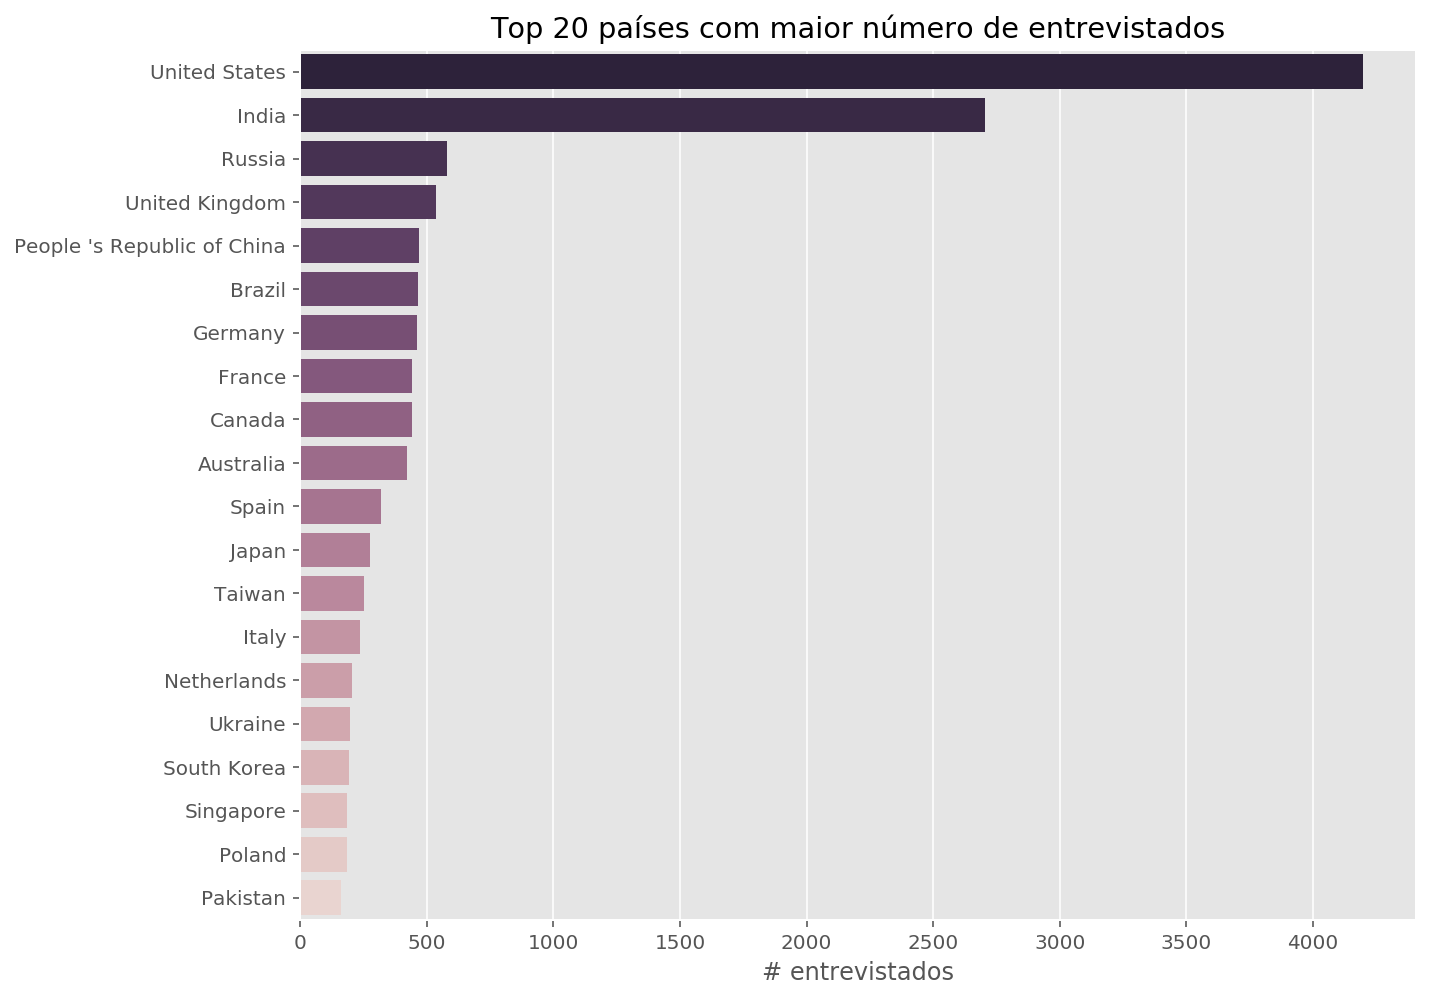

In [8]:
# Numero de países contabilizados e classificados como Other
print('\nNúmero total de países contabilizados:', multiple_choice_df.Country.nunique())
print("Número de países classificados como 'Other':", 171 - multiple_choice_df.Country.nunique())
print('\nPaís com o maior número de entrevistados:', multiple_choice_df.Country.value_counts().index[0], 'com', \
      multiple_choice_df.Country.value_counts().values[0], 'entrevistados\n')

# Exclusão de 'Other' como opção de país
no_other = multiple_choice_df[multiple_choice_df['Country'] != 'Other']

# Top 20 países com maior número de entrevistados
countries = no_other.Country.value_counts()[:20].to_frame()
sns.barplot(countries.Country, countries.index, palette = sns.cubehelix_palette(20, reverse=True))
plt.title('Top 20 países com maior número de entrevistados')
plt.xlabel('# entrevistados')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Cargos mais populares

In [9]:
from wordcloud import WordCloud

In [10]:
clean_jobs = multiple_choice_df.dropna(axis=0, how='any', subset=['CurrentJobTitleSelect', 'PastJobTitlesSelect'])

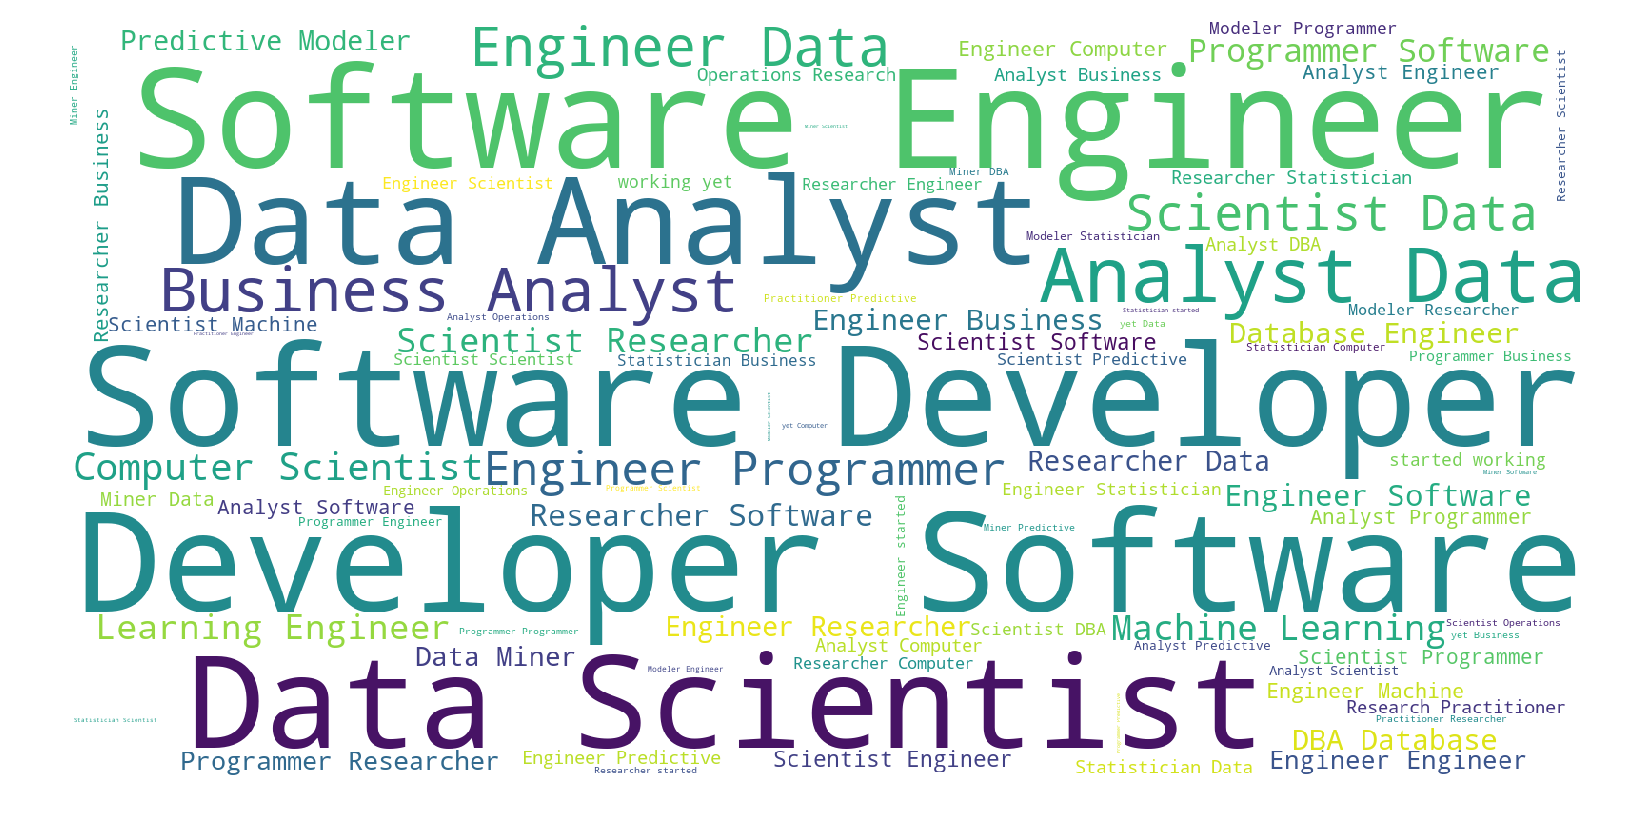

In [12]:
current_job = ' '.join(clean_jobs['CurrentJobTitleSelect'])
past_job = ' '.join(clean_jobs['PastJobTitlesSelect'])
jobs = '{} {}'.format(current_job, past_job)

# Criação do objeto de wordcloud
job_cloud = WordCloud(background_color='white', width=1600, height=800).generate(jobs)
 
# Mostrar imagem
plt.figure(figsize=(14,7))
plt.imshow(job_cloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Podemos perceber que apesar de cargos como Cientista de Dados, Analista de Dados, Analista de Negócios e Engenheiro de Dados estarem populares, eles ainda são muito novos e cargos mais tradicionais como Desenvolvedor de Software e Engenheiro de Software ainda são os títulos mais comuns para o profissional que lida com dados.

## Tecnologias mais utilizadas

In [13]:
subset_df = multiple_choice_df.dropna(subset=['WorkToolsSelect'])
subset_df = subset_df.merge(conversion_rates, left_on='CompensationCurrency', right_on='originCountry', how='left')

python_df = subset_df[(subset_df['WorkToolsSelect'].str.contains('Python')) & (~subset_df['WorkToolsSelect'].str.contains('R'))]
Rlang_df = subset_df[(~subset_df['WorkToolsSelect'].str.contains('Python')) & (subset_df['WorkToolsSelect'].str.contains('R'))]
pyandR_df = subset_df[(subset_df['WorkToolsSelect'].str.contains('Python')) & (subset_df['WorkToolsSelect'].str.contains('R'))]

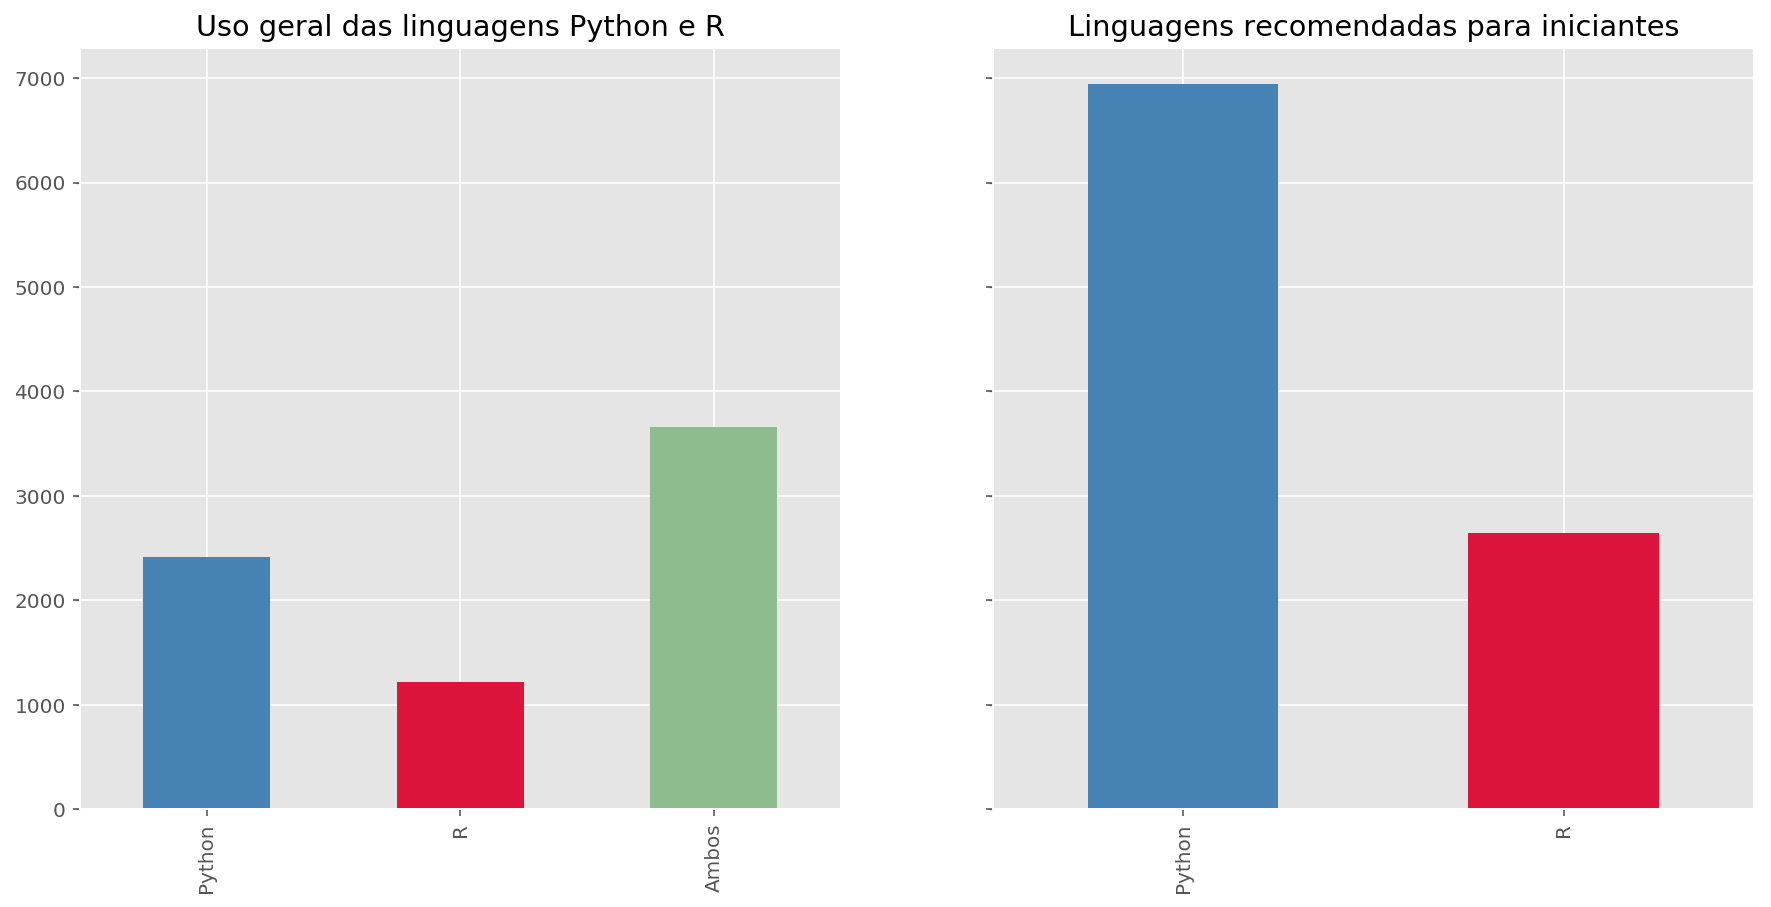

In [14]:
# Criação de dois subplots distintos
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15,7))

# Plot gráfico de uso geral da linguagem
pd.Series([python_df.shape[0], Rlang_df.shape[0], pyandR_df.shape[0]], \
          index=['Python', 'R', 'Ambos']).plot.bar(ax=axes[0], color=['steelblue', 'crimson', 'darkseagreen'])
axes[0].set_title('Uso geral das linguagens Python e R')

# Plot gráfico de recomendação
multiple_choice_df['LanguageRecommendationSelect'].value_counts()[:2].plot.bar(color=['steelblue', 'crimson'])
axes[1].set_title('Linguagens recomendadas para iniciantes')
plt.show()

Ter conhecimento em ambas as linguagens aparentemente é algo oportuno, mas daqueles profissionais que só são proficientes em uma linguagem, Python aparentemente é o favorito.

Relacionado ao gráfico com as linguagens recomendadas para iniciantes (onde Python tem mais que o dobro de recomendações), faz sentido Python ser o favorito, já que o campo (ci6encia de dados e aprendizado de máquina) é algo relativamente recente.

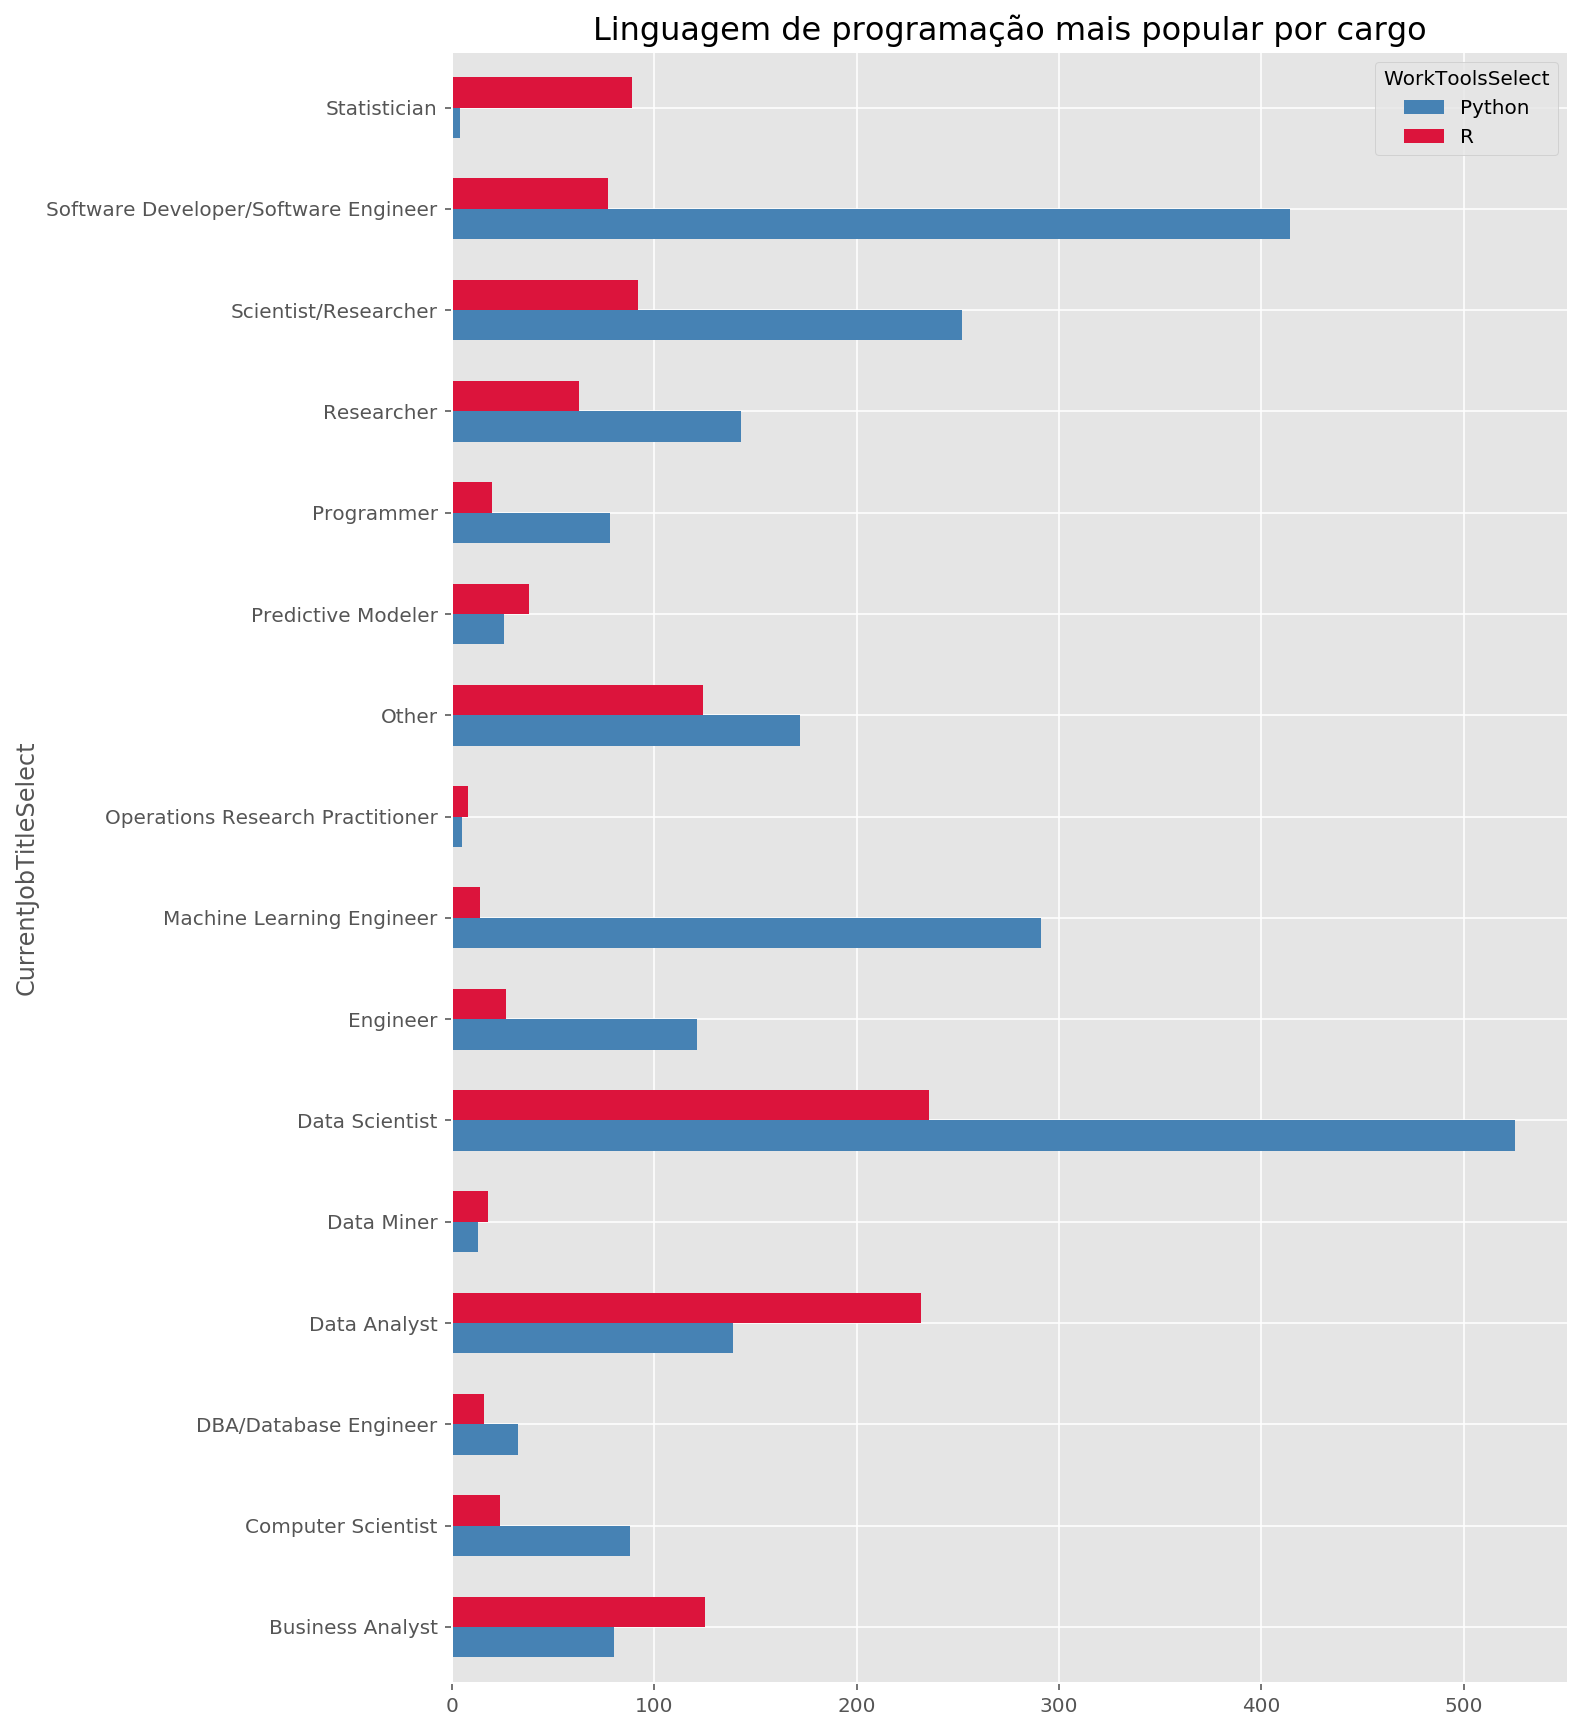

In [15]:
py_df = python_df.copy()
R_df = Rlang_df.copy()

py_df['WorkToolsSelect'] = 'Python'
R_df['WorkToolsSelect'] = 'R'

py_R_df = pd.concat([py_df, R_df])
py_R_df = py_R_df.groupby(['CurrentJobTitleSelect', 'WorkToolsSelect'])['Age'].count().to_frame().reset_index()
py_R_df.pivot('CurrentJobTitleSelect','WorkToolsSelect', 'Age').plot.barh(width=0.6, color=['steelblue', 'crimson'])

fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.title('Linguagem de programação mais popular por cargo', size=16)
plt.show()

No geral a liguagem Python é utlizada em mais cargos que a linguagem R, cerca de 25% dos cargos a mais. 

Levando em conta cargos de caráter geral como Programados e Outros, a linguagem mais utilizada é o Python. Enquanto Estatísticos, Analista de Dados e de Negócios, e pessoas que trabalham com predição de modelos tem uma preferência grande por R.

## Distribuição salarial

In [16]:
conversion_rates.head()

,Unnamed: 0,originCountry,exchangeRate
0,1,USD,1.000000
1,2,EUR,1.195826
2,3,INR,0.015620
3,4,GBP,1.324188
4,5,BRL,0.321350


In [17]:
def drop_comma(amount):
    return amount.replace(',', '')

def drop_negative(amount):
    if amount < 0:
        return 0
    return amount

In [18]:
conversion_rates.drop('Unnamed: 0', axis=1, inplace=True)

### Distribuição por gênero

Salário máximo recebido em USD $ 28297400000
Salário mínimo recebido em USD $ 0
Slário mediano em USD $ 52983.5


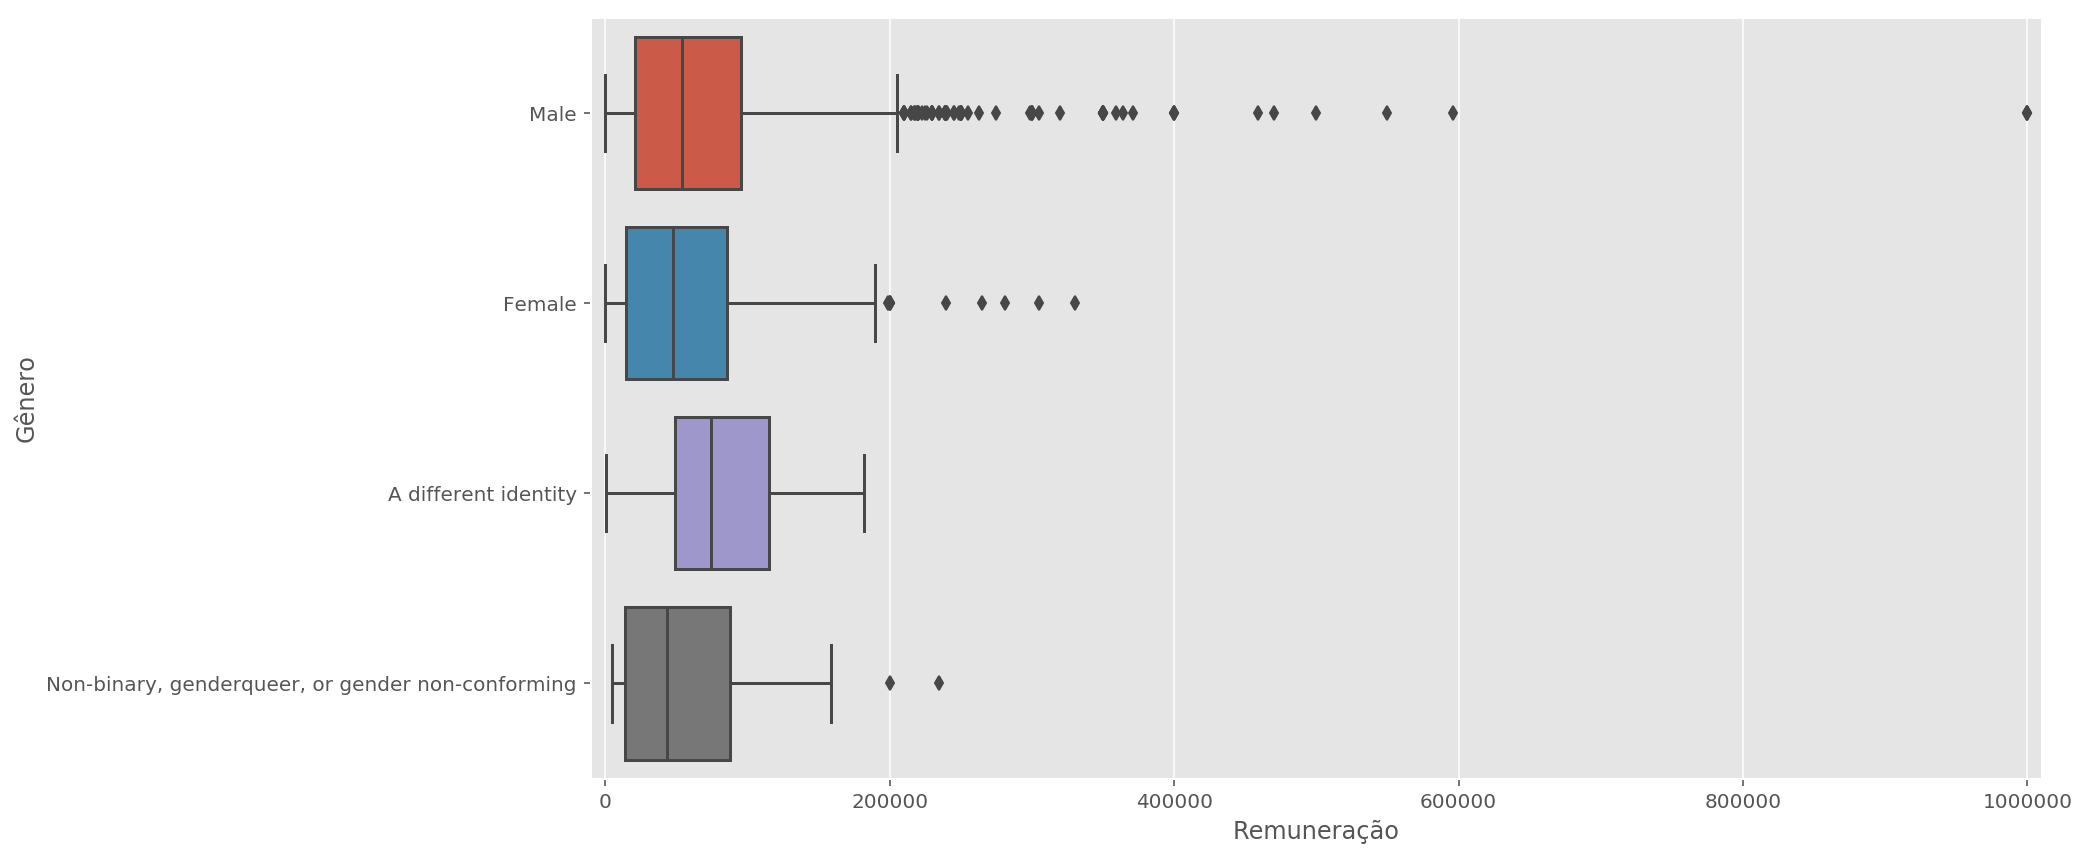

In [23]:
salaries = multiple_choice_df[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salaries = salaries.merge(conversion_rates, left_on='CompensationCurrency', right_on='originCountry', how='left')

#salaries['CompensationAmount'] = salaries['CompensationAmount'].apply(drop_comma)

salaries['Salary'] = pd.to_numeric(salaries['CompensationAmount'], errors='coerce') * salaries['exchangeRate']
salaries['Salary'] = salaries['Salary'].apply(drop_negative)

print('Salário máximo recebido em USD $', salaries['Salary'].dropna().astype(int).max())
print('Salário mínimo recebido em USD $', salaries['Salary'].dropna().astype(int).min())
print('Slário mediano em USD $', round(salaries['Salary'].dropna().astype(int).median(), 2))

fig, axes = plt.subplots(figsize=(13,7))
sns.boxplot(y='GenderSelect', x='Salary', data=salaries)
axes.set_xlim([-10000,1010000])
axes.set(xlabel='Remuneração', ylabel='Gênero') 
plt.show()

Mais uma vez podemos perceber um dado não confiável: o maior salário registrado é superior à 28 bilhões de dólares, um valor maior do que o PIB de muitos países. Por causa deste dado, uma mediana do salário é mais confiável que uma média.

Porém a média do salário entre homens e mulheres não varia tanto. O salário médio dos homens é apenas um pouco maior que o das mulheres. Isso pode ser devido ao salário inicial não variar muito. No entanto, os salários fora da média são muito maiores para os homens do que são para as mulheres.

A média de salário de pessoas que declararam identidade de gênero diferente da norma é significante maior que o de homens e mulheres, mas isso pode ser devido ao fato de que como o número de pessoas é muito menor que o de homens e mulheres, o salário dessas pessoas pode estar melhor distribuído e ter uma quantidade significante de pessoas com um alto salário.

### Distribuição por país

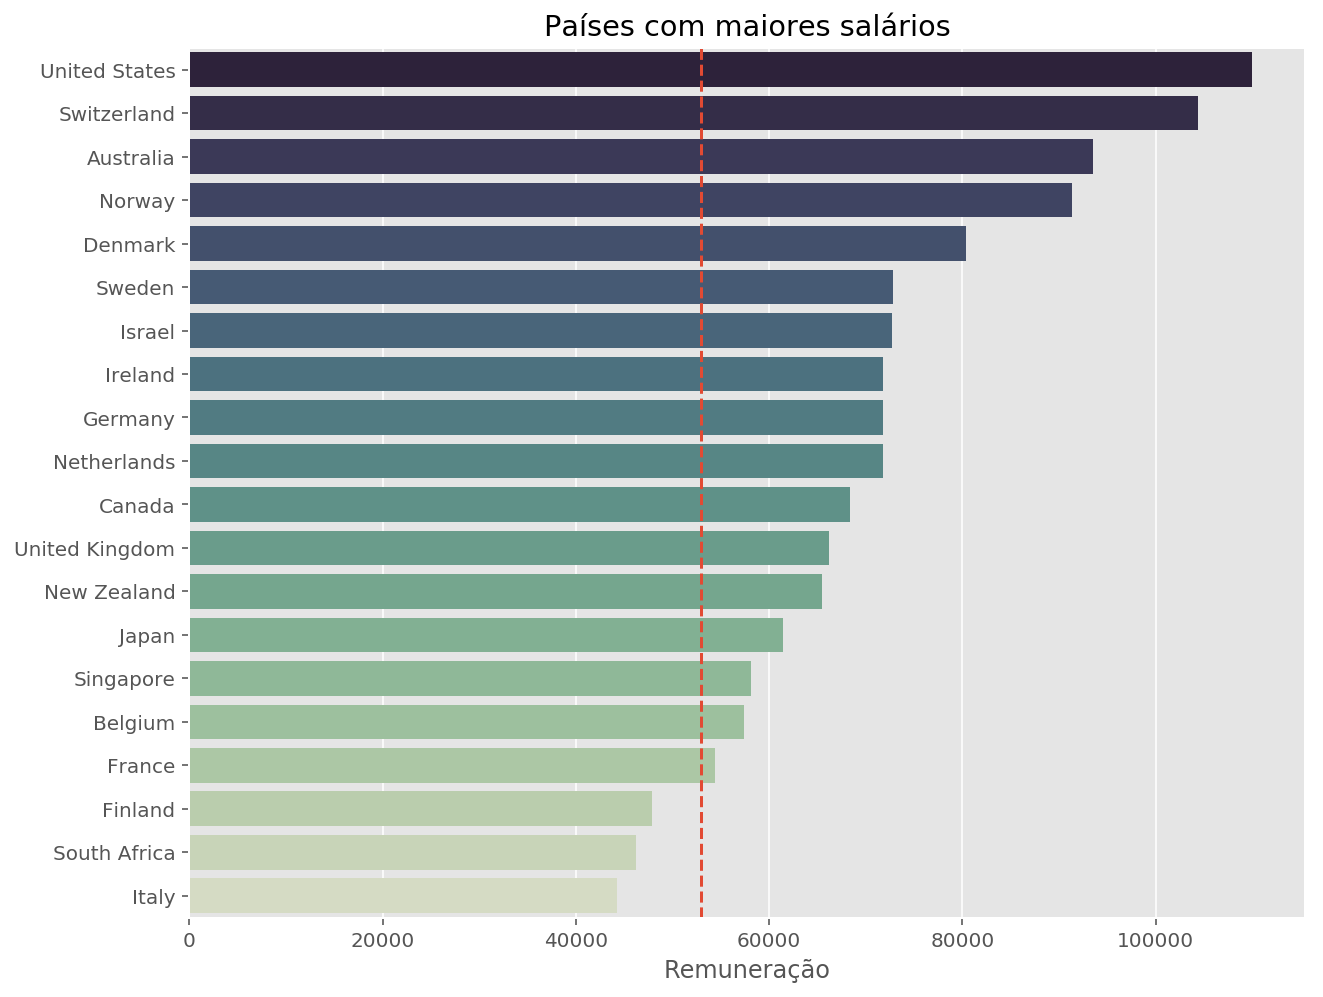

In [24]:
fig, axes = plt.subplots(figsize=(10, 8))

salary_count = salaries.groupby('Country')['Salary'].median().sort_values(ascending=False)[:20].to_frame()

sns.barplot('Salary', salary_count.index, data=salary_count, \
            palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), ax=axes)
axes.axvline(salaries['Salary'].median(), linestyle='dashed')
axes.set_title('Países com maiores salários')
axes.set_xlabel('Remuneração')
axes.set_ylabel('')

plt.show()

Podemos ver que o gráfico dos 20 países com melhores salários não reflete nem um pouco o gráfico de países com maior número de entrevistados. 

Mas algo legal neste gráfico é que apenas 15% dos países estão abaixo do salário médio geral. Porém o país com melhor remuneração tem a média de salário maior que o dobro que o país com menor remuneração dentro deste top 20.

Agora vamos ver como fica o gráfico do salário dos top 20 países em número de entrevistados:

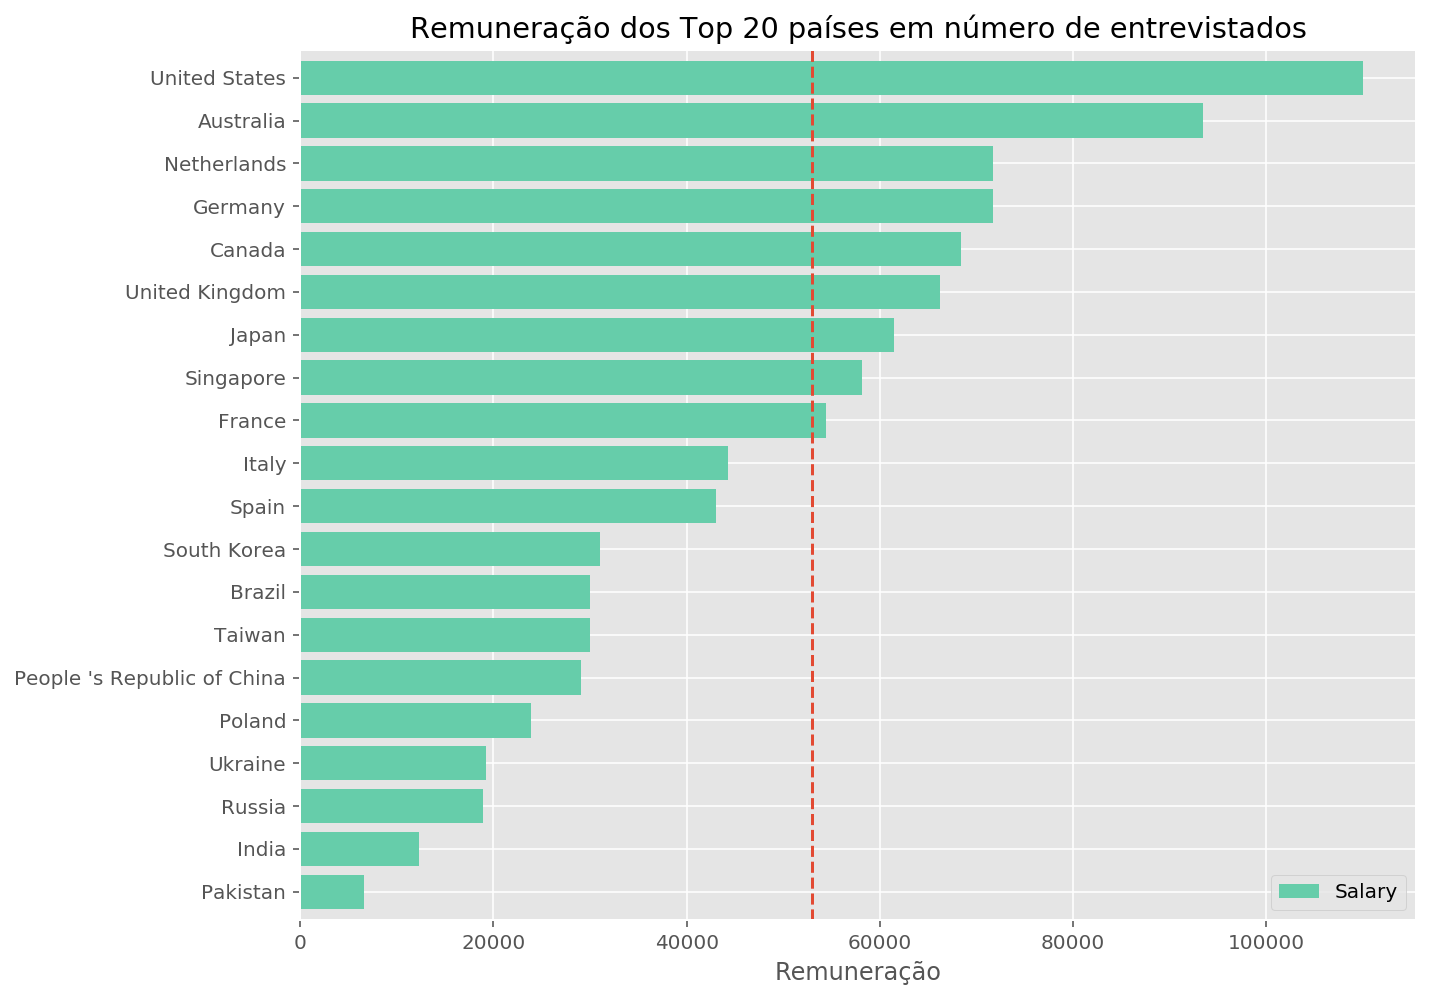

In [25]:
fig, axes = plt.subplots(figsize=(10, 8))

compensation_top20 = salaries.groupby('Country')['Salary'].median().to_frame()
compensation_top20 = compensation_top20[compensation_top20.index.isin(countries.index)]
compensation_top20.sort_values(by='Salary', ascending=True).plot.barh(width=0.8, ax=axes, \
                                                                      color='mediumaquamarine')

axes.axvline(salaries['Salary'].median(), linestyle='dashed')
axes.set_title('Remuneração dos Top 20 países em número de entrevistados')
axes.set_xlabel('Remuneração')
axes.set_ylabel('')

plt.show()

Em relação aos países com maior participação no Kaggle, a ordem de países de acordo com suas remunerações alterou bastante. O Brasil era o 6º em participação no Kaggle mas desceu para 13º em remuneração. 

A Índia, segundo país em número de participação tem 1/10 da remuneração dos Estados Unidos, primeiro país tanto em participação quanto em remuneração.

### Distribuição por cargo

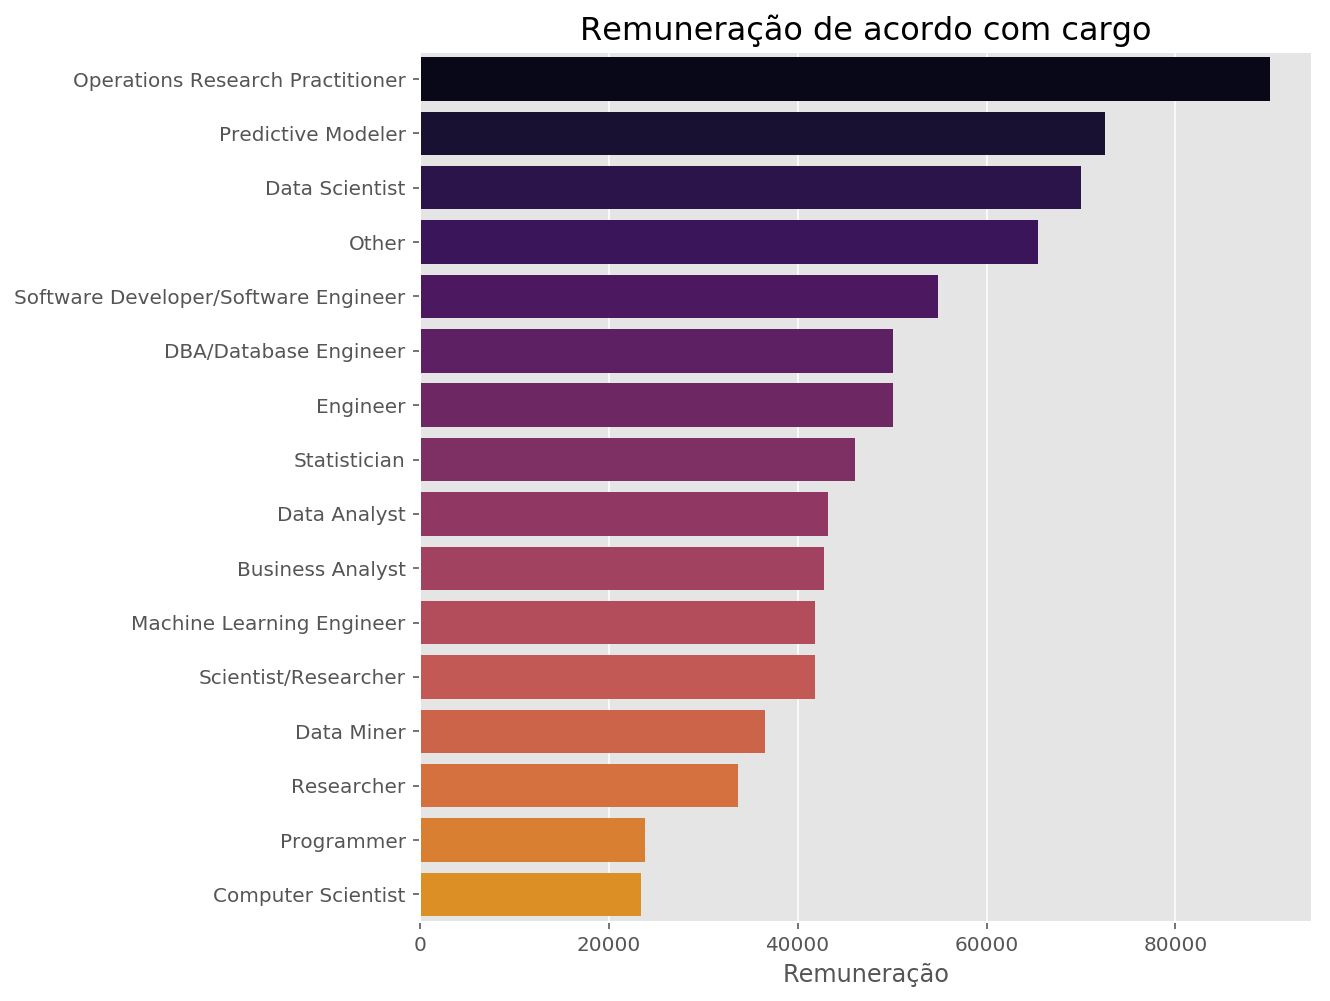

In [26]:
salary_job = salaries.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary', ascending=False)

axes = sns.barplot(salary_job.Salary, salary_job.index, palette=sns.color_palette('inferno',20))
plt.title('Remuneração de acordo com cargo', size=16)

fig = plt.gcf()
fig.set_size_inches(8,8)
axes.set_xlabel('Remuneração')
axes.set_ylabel('')

plt.show()

Comparado ao wordcloud com os cargos mais populares, as maiores remunerações relacionadas não correspondem aos cargos mais populares. Isso provavelmente deve-se ao fato de que alguns cargos específicos que requerem competências específicas e refinadas, tendem a remunerar melhor o empregado.

Esta análise foi inspirada em ambos datasets: [Gender Diversity Analysis of Data Science Industry using Kaggle Survey Dataset in R](https://datascienceplus.com/gender-diversity-analysis-of-data-science-industry-using-kaggle-survey-dataset-in-r/) e [Decoding the Sexiest Job of 21st Century!!](https://www.kaggle.com/gsdeepakkumar/decoding-the-sexiest-job-of-21st-century).